<a href="https://colab.research.google.com/github/NagaGanesh2626/Heart-Disease-Classification-ANN/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart-Disease Classification using ANN

This project is a class assignment by Mike X Cohen sir on Mastering Deep Learning using PyTorch.
Although for a Dataset that contains less feature examples, for educational purposes I have used a Feed Forward Network to check how good a model can perform.
Understanding the DataSet:
 * The Dataset has total 297 feature examples with 13 features and one target column with which the model can be trained
 * The model is multiclass classification (4) but to simplify the process of classifying and for academical purposes it has been converted to a binary classification problem.
( 0-2 : 0 & 2-4: 1)

Final Observations:

* The model got a test accuracy of 84 % when relu activation function is used in the hidden layer, with the train accuracy being 100%. Nummber of batches = 16
* The model got a test accuracy of 86% percent when prelu, tanh, and elu activation functions in the hidden layer, with batch-size = 16
* It has been observed that using 16 batches, the training accuracy was 100% while test accuracy was 84% while the max test accuracy is 86%, so this means the model was memorizing the training data and is not able to generalize and work on new test data.
* So, by changing the batch-size to 32, the accuracy increased to 92% with 150 epochs


In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader,TensorDataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
data = pd.read_csv(url,sep=',',header=None)
data.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','DISEASE']
data = data.replace('?',np.nan).dropna()

print(data.shape)
data.head(20)

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,DISEASE
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [12]:
for i in data:
  print(f"{i} has {data[i].isna().sum()} null values")
data['restecg'].unique()
# No null values to deal with

age has 0 null values
sex has 0 null values
cp has 0 null values
trestbps has 0 null values
chol has 0 null values
fbs has 0 null values
restecg has 0 null values
thalach has 0 null values
exang has 0 null values
oldpeak has 0 null values
slope has 0 null values
ca has 0 null values
thal has 0 null values
DISEASE has 0 null values


array([2., 0., 1.])

In [13]:
data.describe()  #As we can see the data has to be normalized(mean of every feature is not in a same scale)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,DISEASE
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


<ipython-input-14-50f38d1365f5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


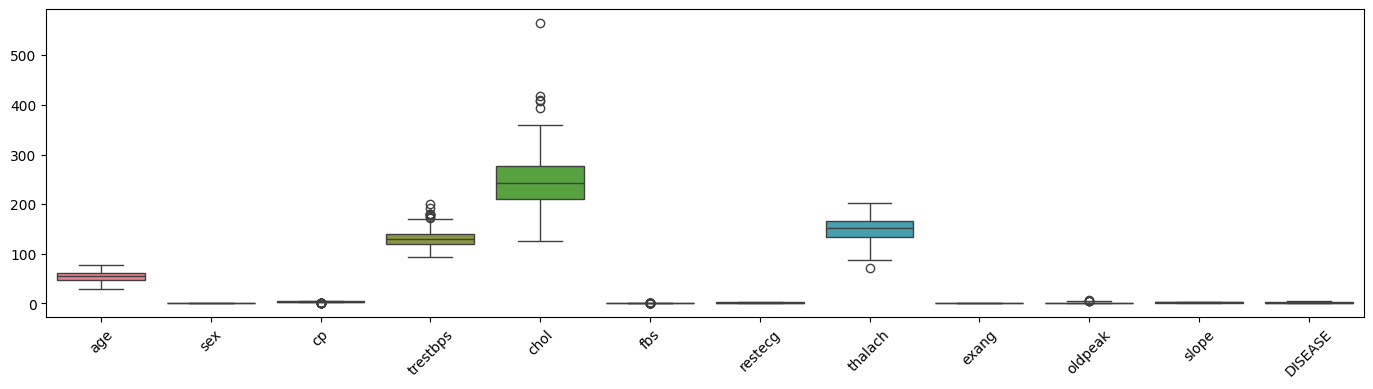

In [14]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [15]:
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop(['sex','fbs','exang','DISEASE'])
cols2zscore

for c in cols2zscore:
  d = pd.to_numeric(data[c]) # force to numeric (addresses some data-format issues)
  data[c] = (d - d.mean())/d.std(ddof=1)

<ipython-input-16-50f38d1365f5>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45)


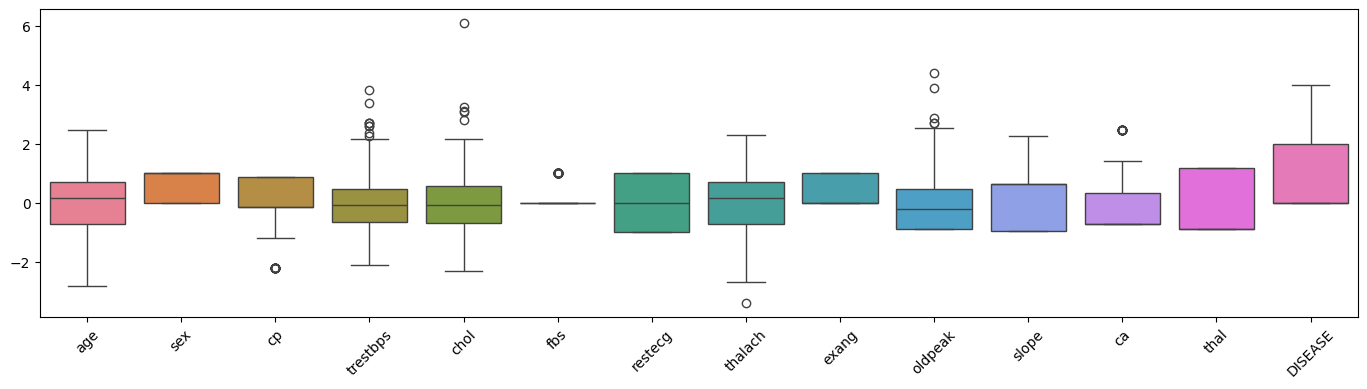

In [16]:
fig,ax = plt.subplots(1,figsize=(17,4))
ax = sns.boxplot(data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.show()

In [17]:
# woohooo the data is now normalized
data['DISEASE'].value_counts()

DISEASE
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [18]:
data['DISEASE'][data['DISEASE']>0] = 1

<ipython-input-18-21479dcd4b79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DISEASE'][data['DISEASE']>0] = 1


In [19]:
data['DISEASE'].value_counts()
# This simplifies our process by making it a simple binary classification model of yes/no heart-disease problem

DISEASE
0    160
1    137
Name: count, dtype: int64

In [29]:


dataT  = torch.tensor( data[data.keys().drop('DISEASE')].values ).float()
labelsT = torch.tensor( data['DISEASE'].values ).float()

labelsT = labelsT[:, None]

In [30]:
dataT.shape

torch.Size([297, 13])

In [31]:
labelsT.shape

torch.Size([297, 1])

In [32]:
train_data,test_data, train_labels,test_labels = train_test_split(dataT, labelsT, test_size=50, random_state = 42)
train_labels = train_labels.float()
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)
# No problem here too

torch.Size([247, 13])
torch.Size([50, 13])
torch.Size([247, 1])
torch.Size([50, 1])


In [33]:
train_data = TensorDataset(train_data,train_labels)
test_data  = TensorDataset(test_data,test_labels)

batchsize    = 32
train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

In [34]:


# len(data.keys())
class Dclassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.input_layer = nn.Linear(13, 32)
    self.hidden_layer = nn.Linear(32, 64)
    self.hidden_layer_1 = nn.Linear(64, 10)
    self.output_layer = nn.Linear(10, 1)
    self.prelu = nn.PReLU(num_parameters=1, init = 0.25)
  def forward(self, x):
    x = F.relu(self.input_layer(x))
    x = F.relu(self.hidden_layer(x))
    x = F.relu(self.hidden_layer_1(x))
    x = self.output_layer(x)
    return x

# Tanh activation function in hidden layer got test accuracy 86 percent
# relu activation function in hidden layer got test accuracy 84 percent
# elu activation function in hidden layer got test accuract 86 percent
# prelu 86 percent

In [35]:
net = Dclassifier()

X,y = next(iter(train_loader))
yHat = net(X)
print(yHat)

# test the loss function
lossfun = nn.BCEWithLogitsLoss()
lossfun(yHat,y).detach()
for X,y in train_loader:
  print(X.shape,  y.shape)

tensor([[0.2115],
        [0.1859],
        [0.1497],
        [0.2145],
        [0.1535],
        [0.2061],
        [0.1722],
        [0.1953],
        [0.1881],
        [0.1926],
        [0.1908],
        [0.2004],
        [0.1704],
        [0.1996],
        [0.1813],
        [0.1467],
        [0.1641],
        [0.1952],
        [0.1856],
        [0.1400],
        [0.1590],
        [0.1573],
        [0.1883],
        [0.1934],
        [0.1867],
        [0.1795],
        [0.1892],
        [0.1937],
        [0.1844],
        [0.1873],
        [0.2105],
        [0.2098]], grad_fn=<AddmmBackward0>)
torch.Size([32, 13]) torch.Size([32, 1])
torch.Size([32, 13]) torch.Size([32, 1])
torch.Size([32, 13]) torch.Size([32, 1])
torch.Size([32, 13]) torch.Size([32, 1])
torch.Size([32, 13]) torch.Size([32, 1])
torch.Size([32, 13]) torch.Size([32, 1])
torch.Size([32, 13]) torch.Size([32, 1])


In [36]:

model = Dclassifier()
lossfn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
numepochs = 150
trainloss = torch.zeros(numepochs)
testloss  = torch.zeros(numepochs)
trainacc  = torch.zeros(numepochs)
testacc   = torch.zeros(numepochs)
for i in range(numepochs):
  batchloss = []

  for inputs, labels in train_loader:

    outputs = model(inputs)
    loss = lossfn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    batchloss.append(loss.item())

    predictions = (torch.sigmoid(outputs)>.5).float()
    trainacc[i] = 100*torch.mean((predictions==labels).float())

  trainloss[i] = np.mean(batchloss)

  ## now for the test
  for X,y in test_loader:
    yHat = model(X)
    loss = lossfn(yHat,y)
    testloss[i] = loss.item()
    testacc[i] = 100*torch.mean(((torch.sigmoid(yHat)>.5).float()==y).float()).item()
testacc

tensor([38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000,
        38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000,
        38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 38.0000, 40.0000,
        40.0000, 40.0000, 40.0000, 44.0000, 44.0000, 54.0000, 56.0000, 58.0000,
        60.0000, 66.0000, 68.0000, 70.0000, 76.0000, 76.0000, 82.0000, 82.0000,
        82.0000, 84.0000, 88.0000, 88.0000, 88.0000, 90.0000, 90.0000, 90.0000,
        90.0000, 90.0000, 88.0000, 88.0000, 88.0000, 88.0000, 88.0000, 88.0000,
        90.0000, 90.0000, 90.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000,
        92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000,
        92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000,
        92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000,
        92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000, 92.0000,
        92.0000, 92.0000, 92.0000, 92.00

In [37]:
import sklearn
print(f"Pandas: {pd.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Torch: {torch.__version__}")
print(f"Sklearn: {sklearn.__version__}")
# Checking version with PyCharm's installed versions

Pandas: 2.0.3
Numpy: 1.25.2
Torch: 2.3.1+cu121
Sklearn: 1.2.2


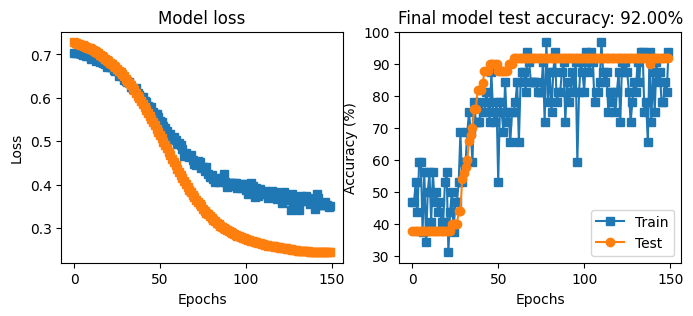

In [38]:
fig,ax = plt.subplots(1,2,figsize=(8,3))

ax[0].plot(trainloss,'s-',label='Train')
ax[0].plot(testloss,'s-',label='Test')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')

ax[1].plot(trainacc,'s-',label='Train')
ax[1].plot(testacc,'o-',label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_title(f'Final model test accuracy: {testacc[-1]:.2f}%')
ax[1].legend()

plt.show()

In [ ]:
trainacc.max()

tensor(100.)

In [ ]:
testacc.max()

tensor(86.)

In [ ]:
# This was the results with 150 epochs relu activation in the hidden layer, with batch size = 20
# As the model has 20 batch size, it started memorizing the data, so I have increased the data to 32

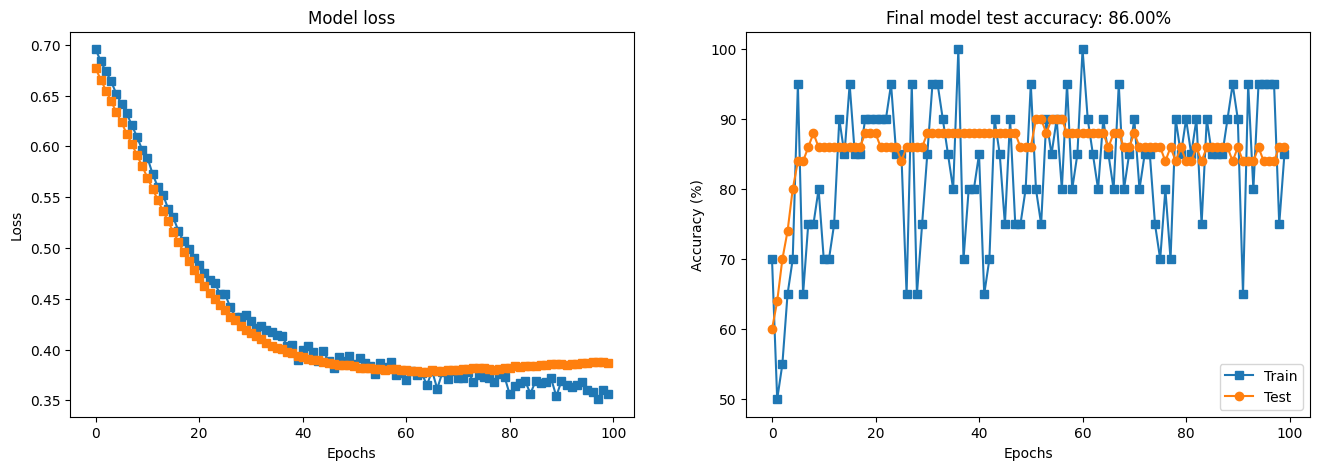

In [ ]:
#This is for 150 epochs, batch_size = 150, hidden_activation = ReLU

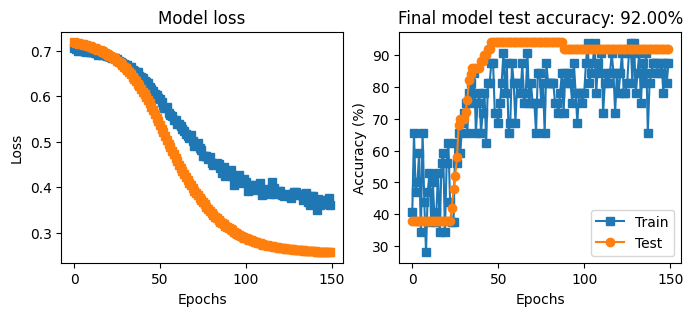